In [102]:
#Import Libraries and depend
#To View and Analyze data
import numpy as np
import pandas as pd
#Matplotlib, Seaborn and Plotly for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
#Linear Regression using Scikit-learn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
#Remove Warning Messages
import warnings
warnings.filterwarnings("ignore")

In [103]:
# Load data
insurance_df = pd.read_csv("insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
#Exploring the data for higher level information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [98]:
#create your own color array
my_colors = ["violet", "purple"]

In [25]:
# add color array to set_palette
# function of seaborn
sns.set_palette(my_colors)

In [26]:
smoker_df = insurance_df[insurance_df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges,smoker_values
0,-1.438764,female,-0.453320,0,yes,southwest,16884.92400,1
11,1.622887,female,-0.717432,0,yes,southeast,27808.72510,1
14,-0.869155,male,1.881033,0,yes,southeast,39611.75770,1
19,-0.655551,male,0.760609,0,yes,southwest,36837.46700,1
23,-0.370746,female,0.206139,1,yes,northeast,37701.87680,1
...,...,...,...,...,...,...,...,...
1313,-1.438764,female,0.662182,2,yes,southwest,36397.57600,1
1314,-0.655551,female,-1.149689,3,yes,northwest,18765.87545,1
1321,1.622887,male,-0.650994,0,yes,northeast,28101.33305,1
1323,0.198863,female,1.592315,2,yes,southeast,43896.37630,1


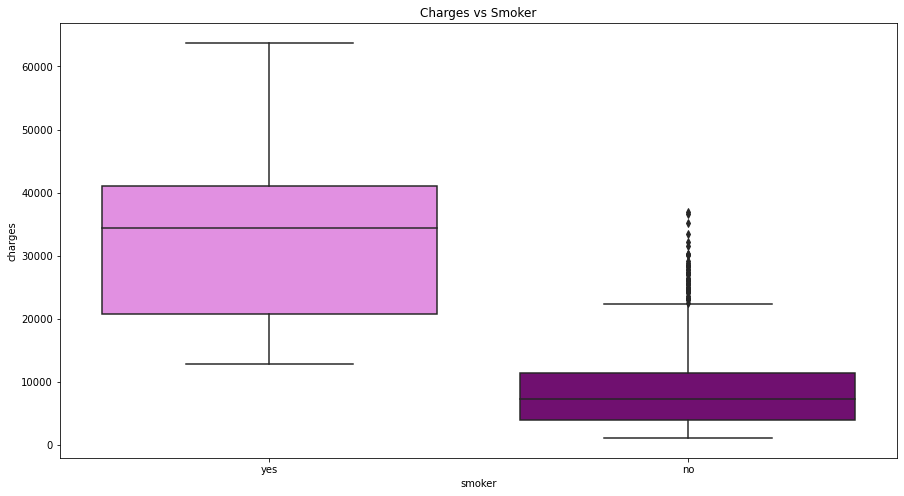

In [6]:
plt.subplots(1,1,figsize=(15,8))
plt.title('Charges vs Smoker')
sns.boxplot(x='smoker', y='charges', data= insurance_df, palette=my_colors)
plt.show()

<AxesSubplot:title={'center':'Charges vs Region vs Smoker'}, xlabel='region', ylabel='charges'>

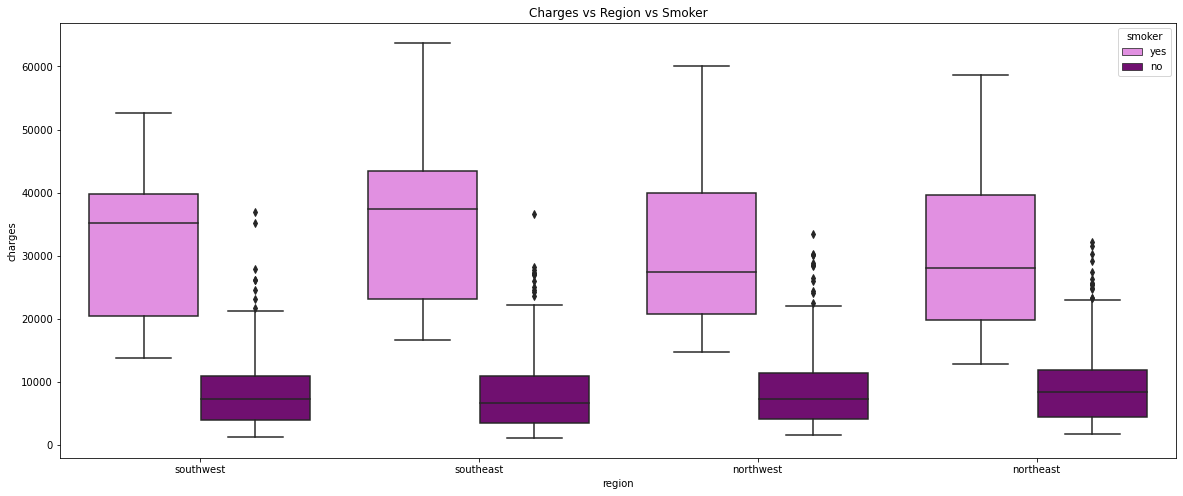

In [31]:
plt.subplots(1,1,figsize=(20,8))
plt.title('Charges vs Region vs Smoker')
sns.boxplot(x='region', y='charges', hue='smoker', data=insurance_df, palette=my_colors)

In [9]:
# Preprocessing of data

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
#Data pre-processing
#encoding the categorical features
# sex 0 or 1
label = LabelEncoder()
label.fit(insurance_df.sex.drop_duplicates())
insurance_df.sex = label.transform(insurance_df.sex)
# smoker or not
label.fit(insurance_df.smoker.drop_duplicates())
insurance_df.smoker = label.transform(insurance_df.smoker)
#region, each region has a number
label.fit(insurance_df.region.drop_duplicates())
insurance_df.region = label.transform(insurance_df.region)

insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [108]:
# Data standardlization 

In [109]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

insurance_df[['age', 'bmi']]=sc.fit_transform(insurance_df[['age', 'bmi']])

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,16884.92400
1,-1.509965,1,0.509621,1,0,2,1725.55230
2,-0.797954,1,0.383307,3,0,2,4449.46200
3,-0.441948,1,-1.305531,0,0,1,21984.47061
4,-0.513149,1,-0.292556,0,0,1,3866.85520


In [110]:
# Training Data and validation

In [111]:
from sklearn.model_selection import train_test_split,cross_val_score

x=insurance_df.drop(['charges'], axis='columns')
y=np.log(insurance_df['charges'])

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=11)

x_train.shape, x_test.shape

((1003, 6), (335, 6))

In [112]:
len(x_test), len(x_train), len(insurance_df)

(335, 1003, 1338)

In [113]:
# Select the best model ( Train and Test the model) 

In [114]:
# Linear Regression

In [115]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [116]:
x = insurance_df.drop(['charges'], axis = 1)
y = insurance_df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))
print(Lin_reg.score(x_train, y_train))

8366.220879490567
[ 3567.2416658    -24.32455098  2001.91202253   443.72929547
 23568.87948381  -288.50857254]
0.799874714544996
0.7368306228430945


In [117]:
# Ridge Regression

In [118]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))
print(Ridge.score(x_train, y_train))

8378.846540814913
[ 3.56428821e+03 -2.15169263e+01  2.00080497e+03  4.44323377e+02
  2.35007304e+04 -2.88968531e+02]
0.7996925500479961
0.7368253622791383


In [119]:
# Lasso Regression

In [120]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))
print(Lasso.score(x_train, y_train))

8365.914452092611
[ 3.56706684e+03 -2.34525271e+01  2.00168492e+03  4.43597274e+02
  2.35675849e+04 -2.88324728e+02]
0.7998682208502539
0.7368306188206066


In [121]:
# Problem ******* 

In [122]:
def train_model(model):
    return model.fit(x_train, y_train)

models={'Linear Regression': Lin_reg,
        'Ridge Regression': Ridge,
        'Lasso Regression': Lasso}

for model in models.values():
    train_model(model)

In [123]:
for name, model in models.items():
    print(model,f'R2 score {model.score(x_test,y_test)}')

LinearRegression() R2 score 0.799874714544996
Ridge(alpha=0.5) R2 score 0.7996925500479961
Lasso(alpha=0.2, normalize=False) R2 score 0.7998682208502539


In [124]:
for name, model in models.items():
    print(model,f'R2 score {model.score(x_train,y_train)}')

LinearRegression() R2 score 0.7368306228430945
Ridge(alpha=0.5) R2 score 0.7368253622791383
Lasso(alpha=0.2, normalize=False) R2 score 0.7368306188206066


In [125]:
Lin_reg.score(x_test, y_test), Lin_reg.score(x_train, y_train)

(0.799874714544996, 0.7368306228430945)

In [126]:
# Cross Validation

In [127]:
cross_val_score(Lin_reg,x_test,y_test,cv=10).mean()
mean_squared_error(y_test,Lin_reg.predict(x_test))
### problem ? prediction error number is very large.

31845929.13415941

In [128]:
cross_val_score(Ridge,x_test,y_test,cv=10).mean()

0.7579611023584116

In [129]:
cross_val_score(Lasso,x_test,y_test,cv=10).mean()

0.7575590663890394

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
print(f'Train MSE {mean_squared_error(y_train,Lin_reg.predict(x_train))}')
print(f'Test MSE {mean_squared_error(y_test,Lin_reg.predict(x_test))}')

Train MSE 37729580.50984919
Test MSE 31845929.13415941


In [132]:
# Lin_reg.predict(x_test) (prediction has a problem ?)

In [133]:
test=pd.DataFrame({'True values': np.exp(y_test),
                   'Linear Regression Predictions': np.exp(Lin_reg.predict(x_test)),
                   'Ridge Regression Predictions': np.exp(Ridge.predict(x_test)),
                   'Lasso Regression Predictions': np.exp(Lasso.predict(x_test))})

In [134]:
# Linear Regression vs Ridge Regression vs Lasso Regression

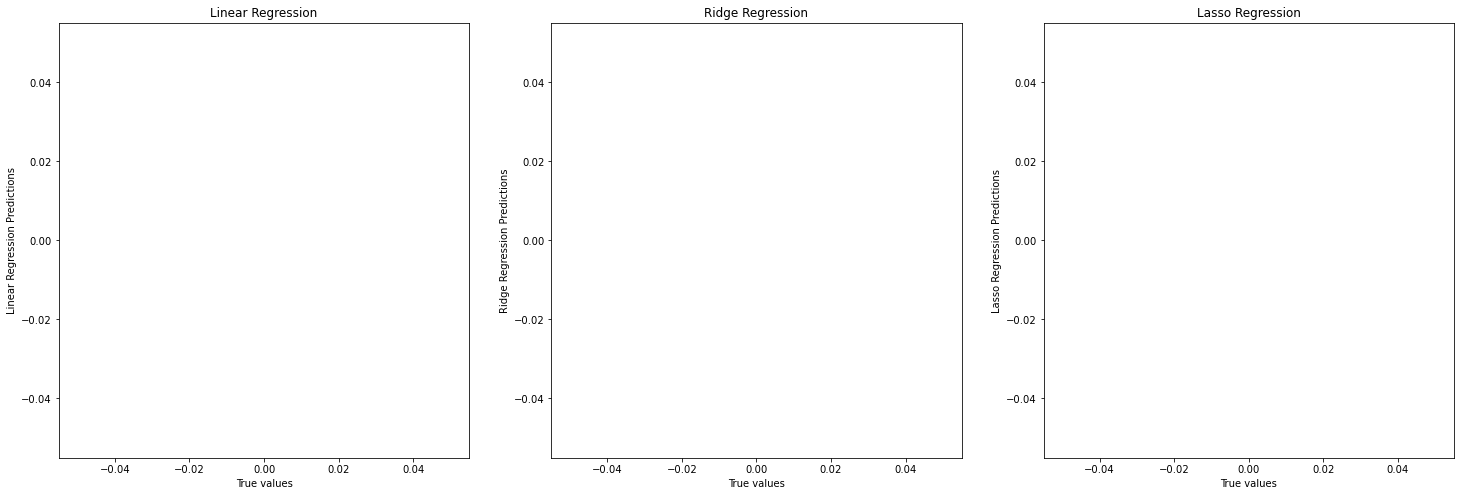

In [135]:
fig,(ax_1,ax_2,ax_3)=plt.subplots(1,3,figsize=(25,8))

ax_1.set_title('Linear Regression')
sns.scatterplot(x='True values',y='Linear Regression Predictions',data=test,ax=ax_1,color='c')
sns.lineplot(x='True values',y='True values',data=test,ax=ax_1,color='c')

ax_2.set_title('Ridge Regression')
sns.scatterplot(x='True values',y='Ridge Regression Predictions',data=test,ax=ax_2,color='r')
sns.lineplot(x='True values',y='True values',data=test,ax=ax_2,color='r')

ax_3.set_title('Lasso Regression')
sns.scatterplot(x='True values',y='Lasso Regression Predictions',data=test,ax=ax_3,color='lightgreen')
sns.lineplot(x='True values',y='True values',data=test,ax=ax_3,color='lightgreen')

plt.show()

In [136]:
test[:50]

,True values,Linear Regression Predictions,Ridge Regression Predictions,Lasso Regression Predictions
578,inf,inf,inf,inf
610,inf,inf,inf,inf
569,inf,inf,inf,inf
1034,inf,inf,inf,inf
198,inf,inf,inf,inf
981,inf,inf,inf,inf
31,inf,inf,inf,inf
1256,inf,inf,inf,inf
1219,inf,inf,inf,inf
1320,inf,inf,inf,inf


In [137]:
# Conclusion 

# After compare between three different regression method , we can see linear regression only has a smaller squared error.   
# Compared to Ridge regression and lasso regression, only Linear regression can provide very good predictions in general.